Data preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
from tensorflow.keras.layers import Input,Lambda, Dense, Flatten
from tensorflow.keras.models import Model,load_model
from tensorflow.keras import models,layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,array_to_img, img_to_array
import numpy as np
import pandas as pd
import os
from glob import glob#for class lablels
import matplotlib.pyplot as plt

In [ ]:


train_path = 'drive/MyDrive/Colab Notebooks/Cotton Disease/train'
valid_path = 'drive/MyDrive/Colab Notebooks/Cotton Disease/val'
test_path="drive/MyDrive/Colab Notebooks/Cotton Disease/test"


In [ ]:
output_classes=glob("drive/MyDrive/Colab Notebooks/Cotton Disease/train/*")

In [ ]:
output_classes#class label

['drive/MyDrive/Colab Notebooks/Cotton Disease/train/diseased cotton leaf',
 'drive/MyDrive/Colab Notebooks/Cotton Disease/train/fresh cotton leaf',
 'drive/MyDrive/Colab Notebooks/Cotton Disease/train/fresh cotton plant',
 'drive/MyDrive/Colab Notebooks/Cotton Disease/train/diseased cotton plant']

In [ ]:
train_image_names = glob('drive/MyDrive/Colab Notebooks/Cotton Disease/train/*/*')
print("Total number of training images: ", len(train_image_names))

Total number of training images:  1951


In [ ]:
train_image_names = pd.Series(train_image_names)

In [ ]:
train_df = pd.DataFrame()# to check data imbalance
train_df['Filename'] = train_image_names.map(lambda img_name: img_name.split("/")[-1])
train_df['Class'] = train_image_names.map(lambda img_name: (img_name.split("/")[-2]))
train_df.head()

,Filename,Class
0,dis_leaf (109)_iaip.jpg,diseased cotton leaf
1,dis_leaf (14)_iaip.jpg,diseased cotton leaf
2,dis_leaf (120)_iaip.jpg,diseased cotton leaf
3,dis_leaf (135)_iaip.jpg,diseased cotton leaf
4,dis_leaf (105)_iaip.jpg,diseased cotton leaf


In [ ]:
train_df.iloc[0][1]#dis_leaf (101)_iaip.jpg

'diseased cotton leaf'

class:  diseased cotton leaf


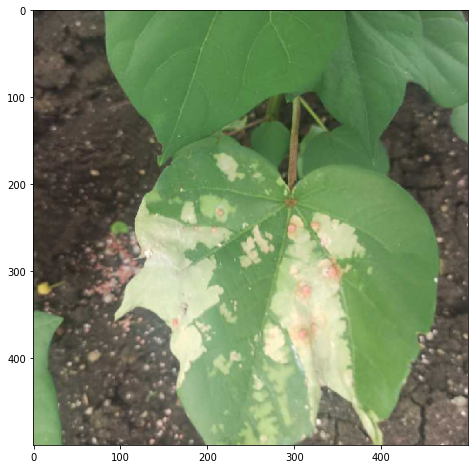

In [ ]:
def show_img(img):
  path="drive/MyDrive/Colab Notebooks/Cotton Disease/train/"+img[1]+"/"+img[0]
  test_image = load_img(path,target_size=(500,500,3)) # load image
  plt.figure(figsize=(10,8))
  plt.imshow(test_image)
  print("class: ",img[1])
show_img(train_df.iloc[0])

In [ ]:
train_df["Class"].value_counts()

diseased cotton plant    815
fresh cotton leaf        427
fresh cotton plant       421
diseased cotton leaf     288
Name: Class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

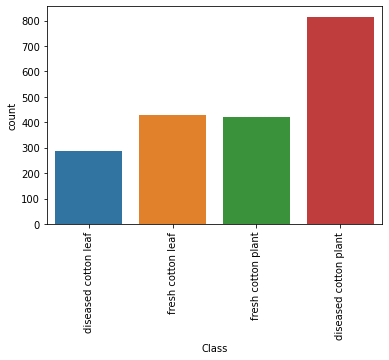

In [ ]:
import seaborn as sns
sns.countplot(train_df["Class"])
plt.xticks(rotation=90)

Gray scale conversion 

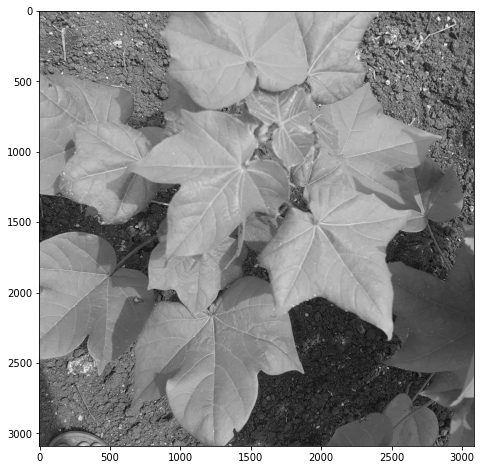

In [ ]:
from skimage import io
import skimage

def show_img(path):
  image = io.imread(path)  
  test_image = skimage.color.rgb2gray(image)# load image
  plt.figure(figsize=(10,8))
  plt.imshow(test_image,cmap="gray")
show_img("/content/drive/MyDrive/Colab Notebooks/Cotton Disease/test/diseased cotton plant/dd (328).jpg")


gray scale conversion not needed as the model needs colored picture to detect the disease

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range=30, fill_mode='nearest',
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

Download Augmented Images

In [ ]:
img = load_img('/content/drive/MyDrive/Colab Notebooks/Cotton Disease/test/diseased cotton plant/dd (328).jpg')
x = img_to_array(img)
# Reshaping the input image
x = x.reshape((1, ) + x.shape) 
i = 0
for batch in train_datagen.flow(x, batch_size = 1,
                          save_to_dir ='/content/drive/MyDrive/Colab Notebooks/Cotton Disease', 
                          save_prefix ='image', save_format ='jpeg'):
    i += 1
    if i > 5:
        break

Display Augmented Images

Text(0.5, 1.0, 'Fifth')

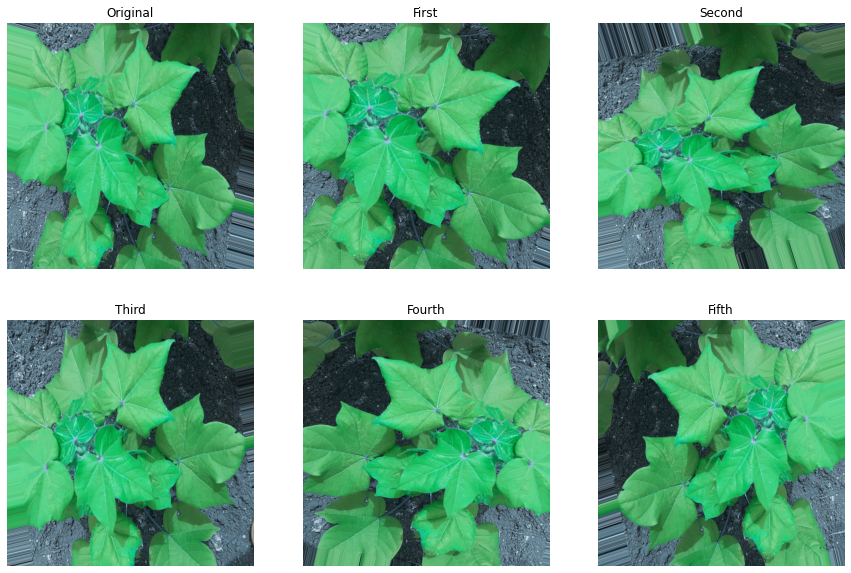

In [ ]:
import cv2
from matplotlib import pyplot as plt
  
# create figure
fig = plt.figure(figsize=(15, 10))
  
# setting values to rows and column variables
rows = 2
columns = 3
  
# reading images
Image1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Cotton Disease/image_0_5967.jpeg')
Image2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Cotton Disease/image_0_4608.jpeg')
Image3 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Cotton Disease/image_0_7689.jpeg')
Image4 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Cotton Disease/image_0_6459.jpeg')
Image5 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Cotton Disease/image_0_9081.jpeg')
Image6 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Cotton Disease/image_0_3792.jpeg')
  
# Adds a subplot at the 1st position
fig.add_subplot(rows, columns, 1)
  
# showing image
plt.imshow(Image1)
plt.axis('off')
plt.title("Original")
  
# Adds a subplot at the 2nd position
fig.add_subplot(rows, columns, 2)
  
# showing image
plt.imshow(Image2)
plt.axis('off')
plt.title("First")
  
# Adds a subplot at the 3rd position
fig.add_subplot(rows, columns, 3)
  
# showing image
plt.imshow(Image3)
plt.axis('off')
plt.title("Second")
  
# Adds a subplot at the 4th position
fig.add_subplot(rows, columns, 4)
  
# showing image
plt.imshow(Image4)
plt.axis('off')
plt.title("Third")

fig.add_subplot(rows, columns, 5)
# showing image
plt.imshow(Image5)
plt.axis('off')
plt.title("Fourth")

fig.add_subplot(rows, columns, 6)
# showing image
plt.imshow(Image6)
plt.axis('off')
plt.title("Fifth")


**Rescale is a value by which we will multiply the data before any other processing. Our original images consist in RGB coefficients in the 0-255, but such values would be too high for our models to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255.**<br>
![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/08/rotation.png)<br>
**Rotation**

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/08/zoom.png)<br>
**Zoom:Any value smaller than 1 will zoom in on the image. Whereas any value greater than 1 will zoom out on the image.**

<img src="https://machinelearningmastery.com/wp-content/uploads/2019/01/Plot-of-Augmented-Images-with-a-Horizontal-Flip.png" width="600" height="300"><br>
**Horizontal flip:An image flip means reversing the rows or columns of pixels in the case of a vertical or horizontal flip respectively.**

<img src="https://i.stack.imgur.com/HMkAE.png"><br>
**'Shear' means that the image will be distorted along an axis, mostly to create or rectify the perception angles. It's usually used to augment images so that computers can see how humans see things from different angles.**

In [ ]:
training_set = train_datagen.flow_from_directory('drive/MyDrive/Colab Notebooks/Cotton Disease/train',
                                                 target_size = (128, 128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
val_set = test_datagen.flow_from_directory('drive/MyDrive/Colab Notebooks/Cotton Disease/val',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 253 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('drive/MyDrive/Colab Notebooks/Cotton Disease/test',
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 106 images belonging to 4 classes.


In [ ]:
cnn=models.Sequential([
    #cnn
    layers.Conv2D(filters=16,kernel_size=(3,3),activation="relu",input_shape=(128,128,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=32,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=128,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(filters=256,kernel_size=(3,3),activation="relu"),
    layers.MaxPooling2D((2,2)),
    #dense
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(150,activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(50,activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(4,activation="softmax")]
)

In [ ]:
cnn.compile(optimizer="Adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0

In [ ]:
import tensorflow as tf
device_name=tf.test.gpu_device_name()
if device_name!='/device:GPU:0':
  raise SystemError("GPU not found")
print("device found",device_name)

device found /device:GPU:0


In [ ]:
from keras.callbacks import ModelCheckpoint

model_path = '/content/drive/My Drive/cnn_2.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callback= [checkpoint]

In [ ]:
with tf.device("/gpu:0"):
  r = cnn.fit_generator(
      training_set,
      validation_data=test_set,
      epochs=100,
      steps_per_epoch=len(training_set),
      validation_steps=len(test_set),
      callbacks=callback
    )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
61/61 [==============================] - ETA: 0s - loss: 1.3300 - accuracy: 0.3849
Epoch 1: val_accuracy improved from -inf to 0.26415, saving model to /content/drive/My Drive/cnn_2.h5
61/61 [==============================] - 603s 10s/step - loss: 1.3300 - accuracy: 0.3849 - val_loss: 1.3663 - val_accuracy: 0.2642
Epoch 2/100
61/61 [==============================] - ETA: 0s - loss: 1.2316 - accuracy: 0.4413
Epoch 2: val_accuracy improved from 0.26415 to 0.38679, saving model to /content/drive/My Drive/cnn_2.h5
61/61 [==============================] - 28s 464ms/step - loss: 1.2316 - accuracy: 0.4413 - val_loss: 1.2474 - val_accuracy: 0.3868
Epoch 3/100
61/61 [==============================] - ETA: 0s - loss: 1.0826 - accuracy: 0.4997
Epoch 3: val_accuracy did not improve from 0.38679
61/61 [==============================] - 27s 446ms/step - loss: 1.0826 - accuracy: 0.4997 - val_loss: 1.0576 - val_accuracy: 0.3868
Epoch 4/100
61/61 [==============================] - ETA: 0s -

In [ ]:
saved_model=load_model("/content/drive/MyDrive/cnn_2.h5")

In [ ]:
_, acc = saved_model.evaluate_generator(training_set, steps=len(training_set), verbose=0)
print('> %.3f' % (acc * 100.0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


> 96.976


In [ ]:
_, acc = saved_model.evaluate_generator(val_set, steps=len(val_set), verbose=0)
print('> %.3f' % (acc * 100.0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


> 95.652


In [ ]:
_, acc = saved_model.evaluate_generator(test_set, steps=len(test_set), verbose=0)
print('> %.3f' % (acc * 100.0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


> 99.057


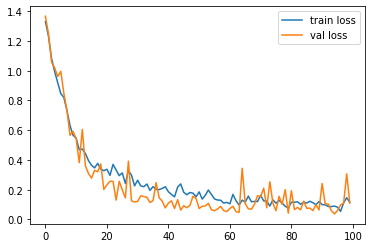

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()

plt.savefig('LossVal_loss')



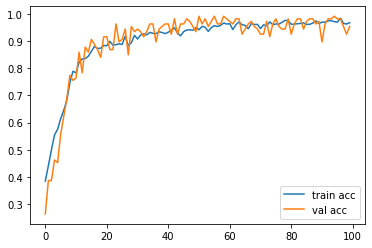

In [ ]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.savefig('AccVal_acc')

In [ ]:
import cv2
import tensorflow as tf

In [ ]:
test_set.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [ ]:
from keras.preprocessing.image import img_to_array

def pred_cot_dieas(cott_plant):
  test_image = load_img(cott_plant,target_size=(128,128,3)) # load image 

  plt.imshow(test_image)
  test_image = img_to_array(test_image)/255 # convert image to np array and normalize
  test_image = np.expand_dims(test_image, axis = 0) # change dimention 3D to 4D
   
  result = saved_model.predict(test_image).round(3) # predict diseased plant or not

   
  pred = np.argmax(result) # get the index of max value

  if pred == 0:
    return "Diseased Cotton Leaf" # if index 0 burned leaf
  elif pred == 1:
      return 'Diseased Cotton Plant' # # if index 1
  elif pred == 2:
      return 'Healthy Cotton Leaf'  # if index 2  fresh leaf
  else:
    return "Healthy Cotton Plant" # if index 3

'Diseased Cotton Plant'

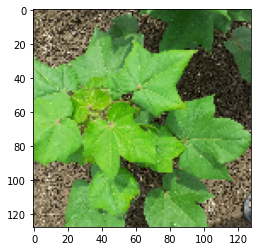

In [ ]:
pred_cot_dieas("/content/drive/MyDrive/Colab Notebooks/Cotton Disease/test/diseased cotton plant/dd (328).jpg")

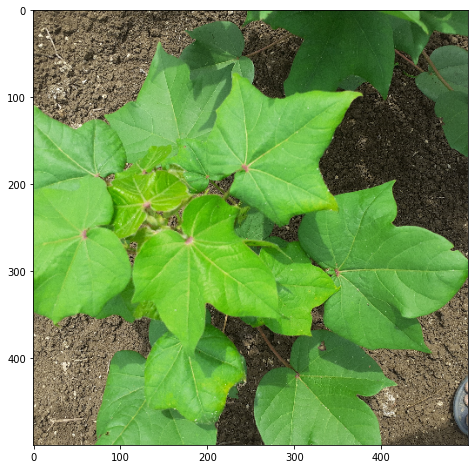

In [ ]:
def show_img2(path):
  test_image = load_img(path,target_size=(500,500,3)) # load image
  plt.figure(figsize=(10,8))
  plt.imshow(test_image)
show_img2("/content/drive/MyDrive/Colab Notebooks/Cotton Disease/test/diseased cotton plant/dd (328).jpg")


'Diseased Cotton Leaf'

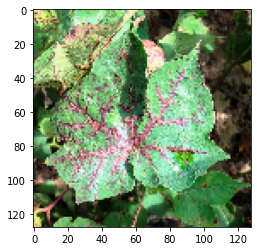

In [ ]:
pred_cot_dieas("/content/drive/MyDrive/Cotton Leaf.jpg")

'Diseased Cotton Leaf'

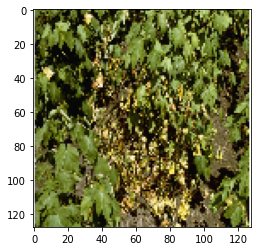

In [ ]:
pred_cot_dieas("/content/drive/MyDrive/cotton_plant.jpg")